<a href="https://colab.research.google.com/github/bhavanitha-jpg/Internship/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
!pip install catboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [48]:
from google.colab import files
uploaded=files.upload()

Saving IMDb Movies India.csv to IMDb Movies India (2).csv


In [55]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')

In [56]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [57]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6548 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6548 non-null   object 
 1   Year      6548 non-null   float64
 2   Duration  4482 non-null   object 
 3   Genre     6446 non-null   object 
 4   Rating    6548 non-null   float64
 5   Votes     6548 non-null   float64
 6   Director  6543 non-null   object 
 7   Actor 1   6423 non-null   object 
 8   Actor 2   6348 non-null   object 
 9   Actor 3   6257 non-null   object 
dtypes: float64(3), object(7)
memory usage: 562.7+ KB


In [79]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2066
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,291


In [60]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [61]:
if "rating" in df.columns:

    movies_toprated = df.sort_values(by="rating", ascending=False).head(10)
    print("\n Highest rated top 10 movies:")
    print(movies_toprated[["title", "rating"]])

    plt.figure(figsize=(10, 6))
    sns.histplot(df["rating"], bins=20, kde=True, color="pink")
    plt.title("Movie Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
    if "genre" in df.columns:
        genre_avgrating = df.groupby("genre")["rating"].mean().sort_values(ascending=False)
        print("\nAverage rating:")
        print(genre_avgrating)

        plt.figure(figsize=(12, 6))
        genre_avgrating.plot(kind="bar", color="blue")
        plt.title("genre avg rating")
        plt.xlabel("Genre")
        plt.ylabel("Average Rating")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("\n'genre' column not found in the dataset.")
else:
    print("\n'rating' column not found in the dataset.")


'rating' column not found in the dataset.


In [62]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [64]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')

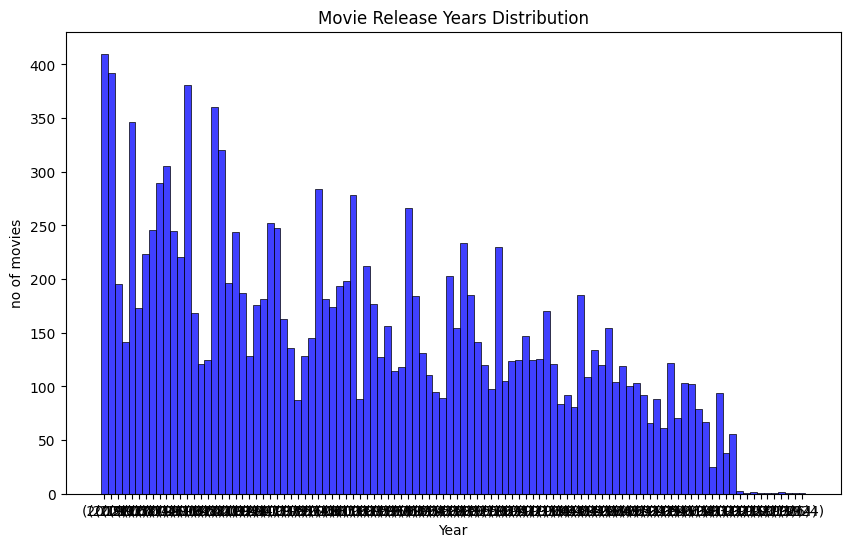

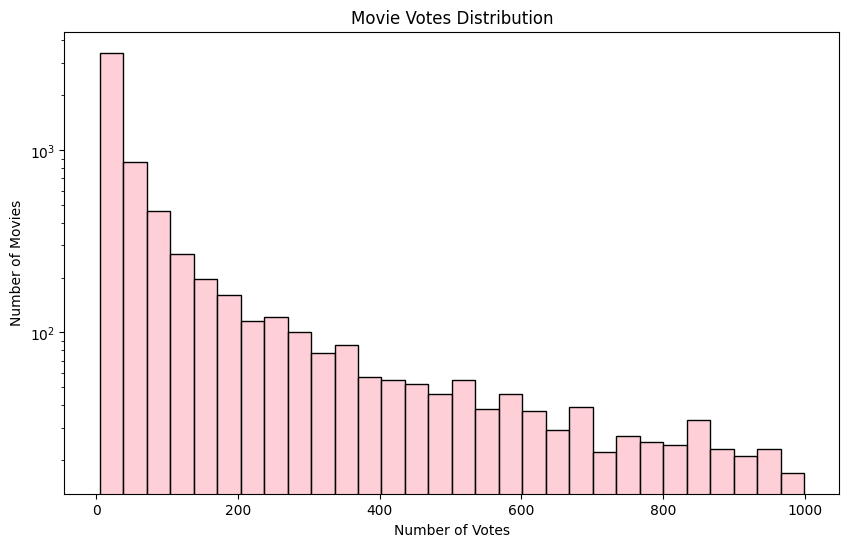

In [65]:
if 'Year' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Year'], bins=30, kde=False, color='blue')
    plt.title('Movie Release Years Distribution')
    plt.xlabel('Year')
    plt.ylabel('no of movies')
    plt.show()
else:
    print("'Year' column not found in the dataset.")



if 'Votes' in df.columns:
    try:
      df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
      df.dropna(subset=['Votes'], inplace=True)
      plt.figure(figsize=(10, 6))
      sns.histplot(df['Votes'], bins=30, kde=False, color='pink')
      plt.title('Movie Votes Distribution')
      plt.xlabel('Number of Votes')
      plt.ylabel('Number of Movies')
      plt.yscale('log')
      plt.show()
    except (ValueError, TypeError):
      print("'Votes' column could not be converted to numeric type")
else:
    print("'Votes' column not found in the dataset.")

In [66]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')


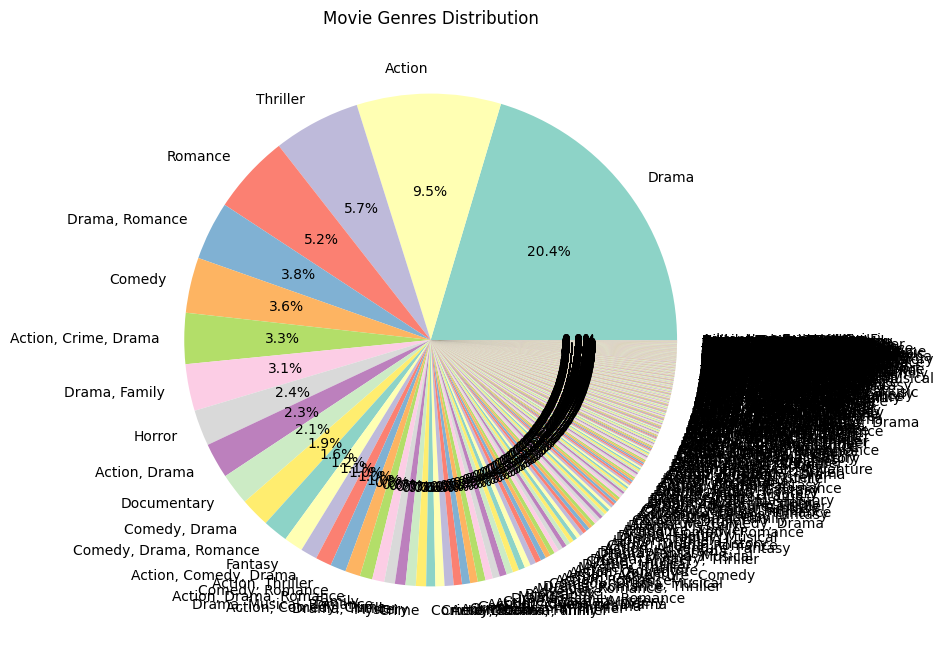

In [67]:
if 'Genre' in df.columns:
    countof_genre = df['Genre'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(countof_genre, labels=countof_genre.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(countof_genre)))
    plt.title('Movie Genres Distribution')
    plt.show()
else:
    print("'Genre' column not found in the dataset.")

In [68]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')


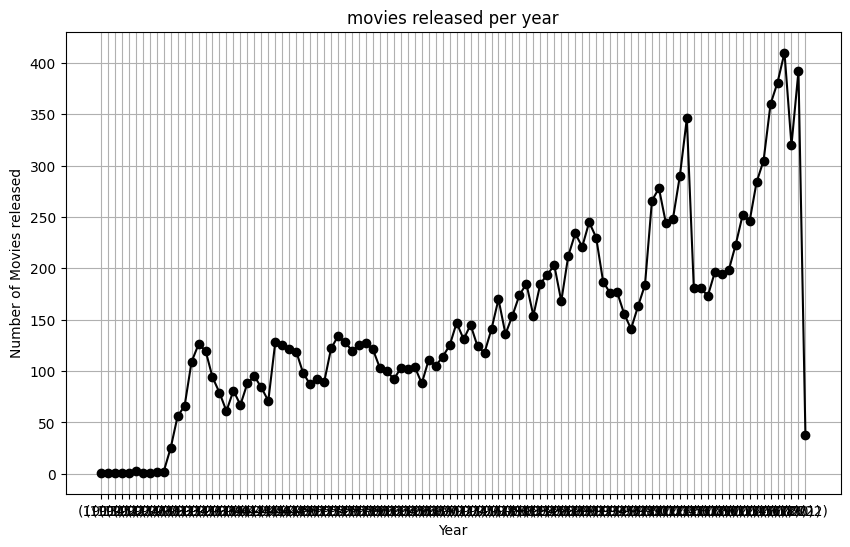

In [69]:
if 'Year' in df.columns:
    countof_movies_per_year = df['Year'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.plot(countof_movies_per_year.index, countof_movies_per_year.values, marker='o', color='black')
    plt.title('movies released per year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies released')
    plt.grid(True)
    plt.show()
else:
    print("'Year' column not found in the dataset.")


In [70]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')

In [71]:
movie_data= df.drop(['Name', 'Genre', 'Rating'], axis=1)
output = df['Rating']


In [73]:
movie_data.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [37]:
output.head()

,Rating
0,NaN
1,7.0
2,NaN
3,4.4
4,NaN


In [74]:
csv_fp = "IMDb Movies India.csv"
try:
    df = pd.read_csv(csv_fp, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_fp, encoding='ISO-8859-1')

In [75]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.dropna(subset=['Votes', 'Rating'], inplace=True)
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})').astype(float)
ft = ['Year', 'Votes']
X = df[ft]
y = df['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extended Gradient Boosting': XGBRegressor(),
    'Light Gradient Boosting': LGBMRegressor(),
    'Cat Boosting': CatBoostRegressor(silent=True),
    'K Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

In [77]:
model_results = {}

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_results[name] = mse


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 5238, number of used features: 2
[LightGBM] [Info] Start training from score 5.769759
